In [ ]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("/content/Train.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,Unnamed..0,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,...,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,SimillarHTTP,Inbound,Label
0,1110,172.16.0.5-192.168.50.1-872-45984-17,172.16.0.5,872,192.168.50.1,45984,17,29:44.0,2,2,0,2944,0,1472,1472,1472.0,0.0,0,0,0.0,0.0,1.470000e+09,1.000000e+06,2.0,0.0,2.0,2,2,2.0,0.0,2,2,0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0,2208.0,1472.0,0.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
1,25998,172.16.0.5-192.168.50.1-867-39632-17,172.16.0.5,867,192.168.50.1,39632,17,31:01.1,43,2,0,2944,0,1472,1472,1472.0,0.0,0,0,0.0,0.0,6.846512e+07,4.651163e+04,43.0,0.0,43.0,43,43,43.0,0.0,43,43,0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0,2208.0,1472.0,0.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
2,10751,172.16.0.5-192.168.50.1-818-826-17,172.16.0.5,818,192.168.50.1,826,17,24:38.4,1,2,0,2944,0,1472,1472,1472.0,0.0,0,0,0.0,0.0,2.940000e+09,2.000000e+06,1.0,0.0,1.0,1,1,1.0,0.0,1,1,0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0,2208.0,1472.0,0.0,40.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
3,15983,172.16.0.5-192.168.50.1-894-32984-17,172.16.0.5,894,192.168.50.1,32984,17,27:01.5,1,2,0,2944,0,1472,1472,1472.0,0.0,0,0,0.0,0.0,2.940000e+09,2.000000e+06,1.0,0.0,1.0,1,1,1.0,0.0,1,1,0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0,2208.0,1472.0,0.0,-2.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,-1,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
4,29733,172.16.0.5-192.168.50.1-877-12571-17,172.16.0.5,877,192.168.50.1,12571,17,26:58.1,3,2,0,2944,0,1472,1472,1472.0,0.0,0,0,0.0,0.0,9.813333e+08,6.666667e+05,3.0,0.0,3.0,3,3,3.0,0.0,3,3,0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0,2208.0,1472.0,0.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP


In [ ]:
df.Label.unique()

array(['DrDoS_LDAP', 'DrDoS_DNS', 'DrDoS_MSSQL', 'DrDoS_UDP',
       'DrDoS_NetBIOS', 'Syn', 'UDP-lag', 'DrDoS_SSDP', 'DrDoS_SNMP',
       'DrDoS_NTP', 'TFTP', 'BENIGN'], dtype=object)

In [ ]:
df1 = df.replace(to_replace ="DrDoS_LDAP", 
                 value =1.0) 
df2 = df1.replace(to_replace ="DrDoS_DNS", 
                 value =2.0)
df3 = df2.replace(to_replace ="DrDoS_MSSQL", 
                 value =3.0)
df4 = df3.replace(to_replace ="DrDoS_UDP", 
                 value =4.0)
df5 = df4.replace(to_replace ="DrDoS_NetBIOS", 
                 value =5.0)
df6 = df5.replace(to_replace ="Syn", 
                 value =6.0)
df7 = df6.replace(to_replace ="UDP-lag", 
                 value =7.0)
df8 = df7.replace(to_replace ="DrDoS_SSDP", 
                 value =8.0)
df9 = df8.replace(to_replace ="DrDoS_SNMP", 
                 value =9.0)
df10 = df9.replace(to_replace ="DrDoS_NTP", 
                 value =10.0)
df11 = df10.replace(to_replace ="TFTP", 
                 value =11.0)
df12 = df11.replace(to_replace ="BENIGN", 
                 value =0.0)

In [ ]:
df12.Label.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,  0.])

In [ ]:
df12["Flow.ID"] = df12["Flow.ID"].str.replace(r'\D', '')
df12["Source.IP"] = df12["Source.IP"].str.replace(r'\D', '')
df12["Destination.IP"] = df12["Destination.IP"].str.replace(r'\D', '')
df12["Timestamp"] = df12["Timestamp"].str.replace(r'\D', '')
df13 = df12.drop(columns=['SimillarHTTP'])
df14 =  df13.replace([np.inf, -np.inf], np.nan)
df15 = df14.fillna(0)


In [ ]:
print(df15.dtypes)

Unnamed..0          int64
Flow.ID            object
Source.IP          object
Source.Port         int64
Destination.IP     object
                   ...   
Idle.Std          float64
Idle.Max          float64
Idle.Min          float64
Inbound             int64
Label             float64
Length: 87, dtype: object


In [ ]:
df16 = df15.astype(float)

In [ ]:
print(df16.dtypes)

Unnamed..0        float64
Flow.ID           float64
Source.IP         float64
Source.Port       float64
Destination.IP    float64
                   ...   
Idle.Std          float64
Idle.Max          float64
Idle.Min          float64
Inbound           float64
Label             float64
Length: 87, dtype: object


In [ ]:
df16.isnull().values.any()

False

In [ ]:
a = df16.drop('Label', axis=1)
b = df16['Label']

In [ ]:
#Univariate feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [ ]:
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(a,b)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [38 39 40 50 53 57 63 64 65 66 67 68] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(a.columns)

In [ ]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [ ]:
featureScores

,Specs,Score
0,Unnamed..0,51955.707092
1,Flow.ID,52.720401
2,Source.IP,1717.360103
3,Source.Port,79216.760878
4,Destination.IP,3533.308104
...,...,...
81,Idle.Mean,2475.944810
82,Idle.Std,1223.552055
83,Idle.Max,2454.288515
84,Idle.Min,2337.354451


In [ ]:
print(featureScores.nlargest(15,'Score'))  #print 15 best features

                     Specs          Score
59     Average.Packet.Size  325735.207411
45       Min.Packet.Length  318628.599899
14   Fwd.Packet.Length.Min  316318.509561
15  Fwd.Packet.Length.Mean  316218.336716
60    Avg.Fwd.Segment.Size  316218.336716
47      Packet.Length.Mean  298842.410780
13   Fwd.Packet.Length.Max  186568.966365
85                 Inbound  130658.003285
54          ACK.Flag.Count  118559.688229
6                 Protocol  109661.807224
3              Source.Port   79216.760878
21            Flow.Bytes.s   67861.143626
46       Max.Packet.Length   58679.169921
0               Unnamed..0   51955.707092
7                Timestamp   38137.974438


In [ ]:
c = df16.drop('Label', axis=1)
d = df16['Label']

In [ ]:
#Feature_Importance 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(c,d)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[5.58492478e-02 1.46351007e-02 5.19944674e-03 6.22813106e-02
 9.11488219e-04 1.64521152e-02 1.84682865e-02 2.59767049e-01
 7.79132036e-03 4.30957268e-03 5.70644978e-04 1.18157252e-02
 4.93668874e-05 2.85666318e-02 4.21485980e-02 4.03612877e-02
 4.02170995e-03 4.08772983e-04 7.07454868e-04 1.53017318e-03
 2.11480458e-04 2.74846404e-02 1.86635511e-02 8.15281474e-03
 5.49512925e-03 5.20683534e-03 2.52781051e-03 8.73437188e-03
 7.83873172e-03 6.35906158e-03 5.91337307e-03 2.49250032e-03
 4.65445193e-04 1.27629894e-04 9.75963797e-05 3.81520893e-04
 6.49936108e-04 1.21294898e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.74273040e-03 1.27371460e-04 1.58287687e-02
 8.03754414e-04 4.65044762e-02 2.61820237e-02 3.39506254e-02
 3.54933414e-03 1.36517665e-03 0.00000000e+00 2.23219919e-05
 9.52057437e-04 0.00000000e+00 2.47075582e-02 1.26928406e-02
 3.56852630e-03 0.00000000e+00 2.83766520e-03 3.47213806e-02
 3.87253553e-02 6.84308728e-04 5.55612173e-03 0.00000000e+00
 0.00000000e+00 0.000000

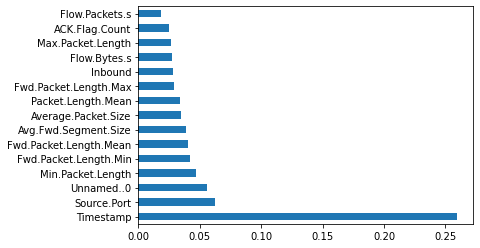

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=c.columns)
feat_importances.nlargest(15).plot(kind='barh')

plt.show()

In [ ]:
feat_importances.nlargest(15).to_frame()
ft = feat_importances.nlargest(15).to_frame()
ft

,0
Timestamp,0.259767
Source.Port,0.062281
Unnamed..0,0.055849
Min.Packet.Length,0.046504
Fwd.Packet.Length.Min,0.042149
Fwd.Packet.Length.Mean,0.040361
Avg.Fwd.Segment.Size,0.038725
Average.Packet.Size,0.034721
Packet.Length.Mean,0.033951
Fwd.Packet.Length.Max,0.028567


In [ ]:
myl = featureScores.nlargest(15,'Score')['Specs']
#myl = list(ft.index)


In [ ]:
X = df16[myl]
y = df16['Label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5962    1    1    0    0    1    5    2    0    1    1    0]
 [   1 5968    0    0    0    0    0    0   11   41    4    0]
 [   0    1 5884    0    1    1    0    1    0  185    0    0]
 [   1    0    0 5954    0    1    0    0    0    0    0    0]
 [   0    0    1    2 6013    1    0    1    0    0    0    0]
 [   0    0    0    0    1 5967    0    1    0    0    0    0]
 [   2    0    0    0    0    0 5958    0    0    0    1    1]
 [   1    0    1    0    3    0    0 5947    0    4    2    0]
 [   0    8    0    0    2    0    0    0 6101    0    0    0]
 [   0   41  209    0    0    2    0    1    0 5811    0    0]
 [   1    0    0    1    0    0    0    2    0    0 5968    1]
 [   1    0    0    5    0    0    0    0    0    0    1 5910]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5974
         1.0       0.99      0.99      0.99      6025
         2.0       0.97      0.97      0.97      6073
         3.0       1.00   

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("precision:",metrics.precision_score(y_test, y_pred,average='micro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='micro'))
print("F1-Score:",metrics.f1_score(y_test, y_pred,average='micro'))

Accuracy: 0.9922638888888888
precision: 0.9922638888888888
Recall: 0.9922638888888888
F1-Score: 0.9922638888888888


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
validation_accuracy = []
validation_f1 =[]
fold_and_validate = KFold(n_splits=10, shuffle=True, random_state=145)
for train_set_indices, validation_set_indices in fold_and_validate.split(X_train):
    cv_train_set = X_train.iloc[train_set_indices]
    cv_train_target = y_train.iloc[train_set_indices]
    
    cv_xvalidation = X_train.iloc[validation_set_indices]
    cv_y_true = y_train.iloc[validation_set_indices]
    cv_y_predicted = classifier.predict(cv_xvalidation)
    
    cv_accuracy_score = accuracy_score(cv_y_true, cv_y_predicted)
    cv_f1_score = f1_score(cv_y_true, cv_y_predicted,  average="weighted")
    validation_accuracy.append(cv_accuracy_score)
    validation_f1.append(cv_f1_score)
    
print("Cross validation accuracies are: ", validation_accuracy)
print("Cross validation f1 scores  are: ", validation_f1)

Cross validation accuracies are:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Cross validation f1 scores  are:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5964    0    2    0    0    0    6    2    0    0    0    0]
 [   2 5979    0    0    0    0    0    1    3   38    2    0]
 [   0    0 5922    0    1    1    0    1    0  147    1    0]
 [   1    0    0 5952    0    1    0    0    0    1    0    1]
 [   0    0    1    2 6010    0    0    1    3    0    1    0]
 [   1    0    1    1    0 5963    0    0    0    3    0    0]
 [   0    0    0    0    0    0 5961    1    0    0    0    0]
 [   0    0    0    0    2    0    0 5947    0    5    4    0]
 [   0    9    1    1    1    0    0    0 6096    2    0    1]
 [   1   27  104    0    0    2    0    0    1 5928    1    0]
 [   4    0    0    0    0    0    0    2    0    0 5966    1]
 [   0    0    0    0    0    0    0    0    0    0    1 5916]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5974
         1.0       0.99      0.99      0.99      6025
         2.0       0.98      0.98      0.98      6073
         3.0       1.00   

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("precision:",metrics.precision_score(y_test, y_pred,average='micro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='micro'))
print("F1-Score:",metrics.f1_score(y_test, y_pred,average='micro'))

Accuracy: 0.9945
precision: 0.9945
Recall: 0.9945
F1-Score: 0.9945


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
validation_accuracy = []
validation_f1 =[]
fold_and_validate = KFold(n_splits=10, shuffle=True, random_state=145)
for train_set_indices, validation_set_indices in fold_and_validate.split(X_train):
    cv_train_set = X_train.iloc[train_set_indices]
    cv_train_target = y_train.iloc[train_set_indices]
    
    cv_xvalidation = X_train.iloc[validation_set_indices]
    cv_y_true = y_train.iloc[validation_set_indices]
    cv_y_predicted = clf.predict(cv_xvalidation)
    
    cv_accuracy_score = accuracy_score(cv_y_true, cv_y_predicted)
    cv_f1_score = f1_score(cv_y_true, cv_y_predicted,  average="weighted")
    validation_accuracy.append(cv_accuracy_score)
    validation_f1.append(cv_f1_score)
    
print("Cross validation accuracies are: ", validation_accuracy)
print("Cross validation f1 scores  are: ", validation_f1)

Cross validation accuracies are:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Cross validation f1 scores  are:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5193    0   11    9  158   35   61   88  194    0  113  112]
 [   2 5828   22   14    0    1    0    4    0   90   64    0]
 [  20   36 5576   80    9    2    0    2    9  218  119    2]
 [  24   38   25 5501   21   19    0    3   57   14   88  166]
 [  84    3    7   74 5613    3    0    9  193    1   29    2]
 [  31    1    1   71    2 5746    0    1    2   92   22    0]
 [  32    0    0    0    0    0 4925  840    0    0    1  164]
 [  35    3    2   14  231    1   37 5615   11    6    3    0]
 [  80   19    7  132   25    9    8   44 5643   51   56   37]
 [   4  143  185   22    0   46    0    4    3 5608   49    0]
 [  30   66   31   23    1    7    0    2    2    1 5803    7]
 [  53    0    3   10    0    0  293    0    1    1    8 5548]]
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90      5974
         1.0       0.95      0.97      0.96      6025
         2.0       0.95      0.92      0.93      6073
         3.0       0.92   

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("precision:",metrics.precision_score(y_test, y_pred,average='micro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='micro'))
print("F1-Score:",metrics.f1_score(y_test, y_pred,average='micro'))

Accuracy: 0.9249861111111111
precision: 0.9249861111111111
Recall: 0.9249861111111111
F1-Score: 0.9249861111111111


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
validation_accuracy = []
validation_f1 =[]
fold_and_validate = KFold(n_splits=10, shuffle=True, random_state=145)
for train_set_indices, validation_set_indices in fold_and_validate.split(X_train):
    cv_train_set = X_train.iloc[train_set_indices]
    cv_train_target = y_train.iloc[train_set_indices]
    
    cv_xvalidation = X_train.iloc[validation_set_indices]
    cv_y_true = y_train.iloc[validation_set_indices]
    cv_y_predicted = knn.predict(cv_xvalidation)
    
    cv_accuracy_score = accuracy_score(cv_y_true, cv_y_predicted)
    cv_f1_score = f1_score(cv_y_true, cv_y_predicted,  average="weighted")
    validation_accuracy.append(cv_accuracy_score)
    validation_f1.append(cv_f1_score)
    
print("Cross validation accuracies are: ", validation_accuracy)
print("Cross validation f1 scores  are: ", validation_f1)

Cross validation accuracies are:  [0.9366666666666666, 0.9337847222222222, 0.9365277777777777, 0.9341666666666667, 0.9365625, 0.9352430555555555, 0.9355902777777778, 0.9342013888888889, 0.9354861111111111, 0.9357291666666666]
Cross validation f1 scores  are:  [0.9365579161527848, 0.93370610206828, 0.9364517725213284, 0.9340470753553237, 0.9364861712790419, 0.9351106863919904, 0.9354874750471673, 0.9340971239644652, 0.9353829933623077, 0.9356100693682589]


In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4396    0   12    0    0    0  577    0    0    4  983    2]
 [   3 3822   21    0    0    0    0    0   13 1530  636    0]
 [   1 2586 1391    1    0    0    0    0   11  883 1198    2]
 [ 520  194    0 4332    0   65   34    1  353  344   38   75]
 [3444    0    3 1080  178    7    9    0 1218    5    1   73]
 [ 241    1    8   55   23 4788  597   13    1    2  240    0]
 [ 833    0    0    0    0    0 5073    0    0    0   56    0]
 [1805    0    0   98   49  104 3670   66   68    6   92    0]
 [3382   12    3 1030    0    0   36    1 1486   77    4   80]
 [  34 1418   48    9   45  122   16   25   21 4204  122    0]
 [  13    2   18    0    0   30    0    0    1  164 5742    3]
 [4282    1    0  803    0    3  324    0   52   66  373   13]]
              precision    recall  f1-score   support

         0.0       0.23      0.74      0.35      5974
         1.0       0.48      0.63      0.54      6025
         2.0       0.92      0.23      0.37      6073
         3.0       0.58   

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("precision:",metrics.precision_score(y_test, y_pred,average='micro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='micro'))
print("F1-Score:",metrics.f1_score(y_test, y_pred,average='micro'))

Accuracy: 0.49293055555555554
precision: 0.49293055555555554
Recall: 0.49293055555555554
F1-Score: 0.49293055555555554


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
validation_accuracy = []
validation_f1 =[]
fold_and_validate = KFold(n_splits=10, shuffle=True, random_state=145)
for train_set_indices, validation_set_indices in fold_and_validate.split(X_train):
    cv_train_set = X_train.iloc[train_set_indices]
    cv_train_target = y_train.iloc[train_set_indices]
    
    cv_xvalidation = X_train.iloc[validation_set_indices]
    cv_y_true = y_train.iloc[validation_set_indices]
    cv_y_predicted = gnb.predict(cv_xvalidation)
    
    cv_accuracy_score = accuracy_score(cv_y_true, cv_y_predicted)
    cv_f1_score = f1_score(cv_y_true, cv_y_predicted,  average="weighted")
    validation_accuracy.append(cv_accuracy_score)
    validation_f1.append(cv_f1_score)
    
print("Cross validation accuracies are: ", validation_accuracy)
print("Cross validation f1 scores  are: ", validation_f1)

Cross validation accuracies are:  [0.4910763888888889, 0.49517361111111113, 0.4948263888888889, 0.49291666666666667, 0.4945486111111111, 0.4900347222222222, 0.4901041666666667, 0.4953125, 0.4934722222222222, 0.4907986111111111]
Cross validation f1 scores  are:  [0.4299467986794488, 0.43485946151710525, 0.4334148028006869, 0.4305435024011452, 0.4324984911956126, 0.42914710427121794, 0.4290944444536504, 0.4322312318159786, 0.4317065455323971, 0.42893758512531954]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection

model_sgb = GradientBoostingClassifier(n_estimators=100, random_state=10)
model_sgb.fit(X_train,y_train)
y_pred = model_sgb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5965    0    0    0    1    1    4    3    0    0    0    0]
 [   1 5970    0    0    0    0    1    2    4   47    0    0]
 [   1    0 5913    0    0    0    0    1    0  157    1    0]
 [   2    0    0 5951    0    0    0    0    0    0    0    3]
 [   0    1    1    1 6013    0    0    1    0    0    1    0]
 [   1    0    1    0    1 5966    0    0    0    0    0    0]
 [   0    0    0    0    0    0 5961    0    0    0    0    1]
 [   2    0    0    0    0    0    0 5947    1    8    0    0]
 [   0    8    0    0    2    0    0    0 6101    0    0    0]
 [   0   15  100    0    1    2    0    1    0 5945    0    0]
 [   3    0    0    0    1    0    1    1    1    0 5965    1]
 [   2    0    0    1    0    0    0    0    1    0    2 5911]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5974
         1.0       1.00      0.99      0.99      6025
         2.0       0.98      0.97      0.98      6073
         3.0       1.00   

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("precision:",metrics.precision_score(y_test, y_pred,average='micro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='micro'))
print("F1-Score:",metrics.f1_score(y_test, y_pred,average='micro'))

Accuracy: 0.9945555555555555
precision: 0.9945555555555555
Recall: 0.9945555555555555
F1-Score: 0.9945555555555555


In [ ]:
from sklearn.model_selection import KFold
validation_accuracy = []
validation_f1 =[]
fold_and_validate = KFold(n_splits=10, shuffle=True, random_state=145)
for train_set_indices, validation_set_indices in fold_and_validate.split(X_train):
    cv_train_set = X_train.iloc[train_set_indices]
    cv_train_target = y_train.iloc[train_set_indices]
    
    cv_xvalidation = X_train.iloc[validation_set_indices]
    cv_y_true = y_train.iloc[validation_set_indices]
    cv_y_predicted = model_sgb.predict(cv_xvalidation)
    
    cv_accuracy_score = accuracy_score(cv_y_true, cv_y_predicted)
    cv_f1_score = f1_score(cv_y_true, cv_y_predicted,  average="weighted")
    validation_accuracy.append(cv_accuracy_score)
    validation_f1.append(cv_f1_score)
    
print("Cross validation accuracies are: ", validation_accuracy)
print("Cross validation f1 scores  are: ", validation_f1)

Cross validation accuracies are:  [0.9956944444444444, 0.9954513888888888, 0.9945833333333334, 0.9952777777777778, 0.9957291666666667, 0.9951041666666667, 0.9943402777777778, 0.9960763888888889, 0.9952083333333334, 0.9953819444444445]
Cross validation f1 scores  are:  [0.9956969705751669, 0.9954547120317379, 0.9945936848543945, 0.9952843994528815, 0.9957339687968829, 0.9951186311350494, 0.9943521292234064, 0.9960775208769921, 0.9952161812219477, 0.9953872615002436]
